# Local Regression

## Load Data

In [1]:
import math
import numpy as np
from sklearn.datasets import load_boston

In [2]:
X = load_boston().data[:, 12]
y = load_boston().target

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

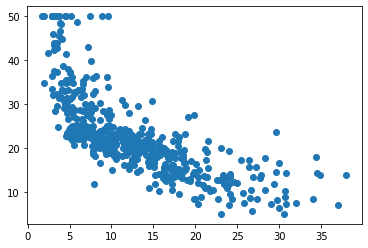

In [5]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

---

## My Local Regression

In [7]:
class MyLocalRegression:
    def __init__(self, kernel='Tri-Cube', width=10):
        self.kernel = kernel
        self.width = width
    
    def tricube(self, x):
        return np.where(abs(x) <= 1, (1-abs(x)**3)**3, 0)
    
    def epanechnikov(self, x):
        return np.where(abs(x) <= 1, 0.75*(1-x**2), 0)
    
    def gaussian(self, x):
        return 1/np.sqrt(2*math.pi)*np.exp(-0.5*(x**2))
    
    def predict(self, X_train, y_train, X_test):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_test = np.array(X_test)
        y_pred = np.array([])
        for i in range(len(X_test)):
            t = abs(X_train-X_test[i])/self.width
            if self.kernel == 'Tri-Cube':
                d = self.tricube(t)
            elif self.kernel == 'Epanechnikov':
                d = self.epanechnikov(t)
            else:
                d = self.gaussian(t)
            X_train_nonzero = np.column_stack((np.power(X_train[d != 0], 0), X_train[d != 0]))
            y_train_nonzero = y_train[d != 0]
            W = np.diag(d[d != 0])
            y_pred = np.append(y_pred, np.transpose(np.array((1, X_test[i]))).dot(np.linalg.inv(np.transpose(X_train_nonzero).dot(W).dot(X_train_nonzero))).dot(np.transpose(X_train_nonzero)).dot(W).dot(y_train_nonzero))
        return y_pred

In [8]:
model = MyLocalRegression(width=5)

In [9]:
X_plot = np.linspace(np.min(X_train), np.max(X_train), 1000)
y_plot = model.predict(X_train, y_train, X_plot)

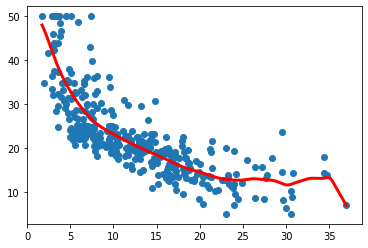

In [10]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.plot(X_plot, y_plot, linewidth=3, color='red')
plt.show()

In [11]:
y_pred = model.predict(X_train, y_train, X_test)

In [12]:
from sklearn.metrics import mean_squared_error as mse

In [13]:
print('MSE of My LocalRegression with Tri-Cube Kernel:', mse(y_test, y_pred))

MSE of My LocalRegression with Tri-Cube Kernel: 30.258516391927227


---

## Compare to Scikit-Learn

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [15]:
model = LinearRegression()

In [16]:
X_train = X_train.reshape(-1, 1)

In [17]:
model.fit(PolynomialFeatures(degree=2).fit_transform(X_train), y_train)

LinearRegression()

In [18]:
X_test = X_test.reshape(-1, 1)

In [19]:
y_pred = model.predict(PolynomialFeatures(degree=2).fit_transform(X_test))

In [20]:
print('MSE of sklearn PolynomialRegression:', mse(y_test, y_pred))

MSE of sklearn PolynomialRegression: 33.60239474228597
